# Files

transient and persistent programs: 

Most of the programs we have seen so far are **transient** in the sense that they run *for a short time* and produce some output, but when they end, their data disappears. If you run the program again, it starts with a clean slate.

Other programs are **persistent**: they run *for a long time* (or all the time); they keep at least some of their data in permanent storage (a hard drive, for example); and if they shut down and restart, they pick up where they left off.

## 1. read and write files

To write a file, you have to open it with mode 'w' as a second parameter:

In [13]:
fout = open('resourse\out.txt', 'w')
line1 = "This here's the wattle,\n"
fout.write(line1)

24

If the file already exists, opening it in write mode **clears out the old data and starts fresh**,
so be careful! If the file doesn’t exist, a new one is created.

`open` returns a file object that provides methods for working with the file

The `write` method puts data into the file. The argument of `write` has to be a string

## 2. format operator  *%*

When applied to integers, % is the modulus operator. But when the first operand is a string, % is the format operator.

In [5]:
camels = 42
str = ' I have spotted %d camels.' % camels
print(str)

 I have spotted 42 camels.


multiple format sequences, the second argument has to be a tuple

In [9]:
str2  = 'In %d years I have spotted %g %s.' % (3, 0.1, 'camels')
print(str2)
# '%d' to format an integer, '%g' to format a floating-point number, and '%s' to format a string


In 3 years I have spotted 0.1 camels.


an alternative is to use string method `format`

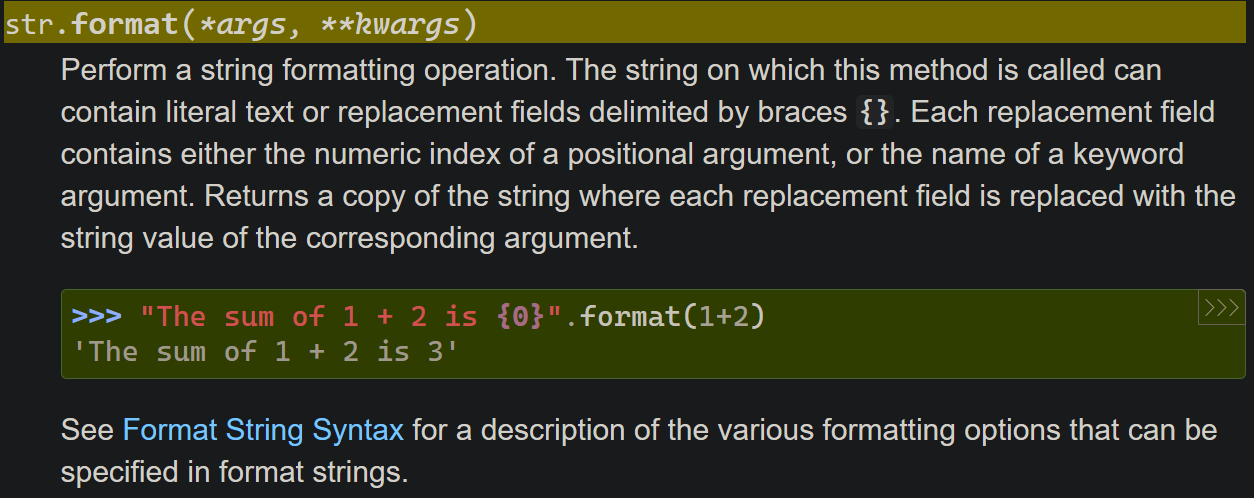

## 3. filenames and paths

### 3.1 current workong directory

the `os` module provides functions for working with files and directories ("os" stands for "operating system"). `os.getcwd` returns the name of the current directory

In [10]:
import os
cwd = os.getcwd()
print(cwd)

c:\Users\DELL\.vscode\jupyter


### 3.2 relative paths and absolute paths

A simple filename, like memo.txt is also considered a path, but it is a relative path because
it **relates to the current directory**. If the current directory is /home/dinsdale, the filename
memo.txt would refer to /home/dinsdale/memo.txt.

A path that begins with / does not depend on the current directory; it is called an absolute
path. To find the absolute path to a file, you can use `os.path.abspath`:

In [14]:
os.path.abspath('resourse\out.txt')

'c:\\Users\\DELL\\.vscode\\jupyter\\resourse\\out.txt'

`os.path` methods:

In [16]:
os.path.abspath('resourse\out.txt')# return the absolute path
os.path.exists('resourse\out.txt')# check whether a file or directory exists
os.path.isdir('resourse\out.txt')# check whether it's a directory
os.path.isfile('resourse\out.txt')# check whether it's a file
os.path.join(cwd, 'resourse\out.txt')# join two or more path components

'c:\\Users\\DELL\\.vscode\\jupyter\\resourse\\out.txt'

`os.lisrdir` method

In [18]:
print(type(os.listdir(cwd)))
print(os.listdir(cwd))

<class 'list'>
['.git', '.vscode', 'dictionaries.ipynb', 'files.ipynb', 'lists.ipynb', 'out.txt', 'resourse', 'tuples.ipynb']


In [21]:
def walk(dirname):
    ''' print the names of all files in dirname and its subdirectories.'''
    for name in os.listdir(dirname):
        path = os.path.join(dirname, name)
        if os.path.isfile(path):
            print(path)
        else:
            walk(path)

walk('resourse')

resourse\dir1\file0.txt
resourse\filelesson.txt
resourse\out.txt


### 3.3 exceptions handling

In [1]:
try:# try something that might go wrong
    fin = open('bad_file')
except:# if the file doesn't exist, a traceback error will be raised
    print('Something went wrong.')


Something went wrong.


## 4. database

The biggest difference between a database and a dictionary is that the database is on disk (or other permanent storage), so **it persists after the program ends**. Since a database is stored on permanent storage, it can store far **more data** than a dictionary, which is limited to the size of the memory in the computer.

In [1]:
import dbm
db = dbm.open('database0', 'c')
# The mode 'c' means that the database should be created if it doesn’t already exist.
db['resourse\database0\QQ图片20200725130837.jpg'] = 'This is a test.'
db['resourse\database0\QQ图片20200725130837.jpg']# return the bytes object

b'This is a test.'

A bytes object is similar to a string in many ways

In [2]:
for keys in db:
    print(keys, db[keys])

db.close()

b'resourse\\database0\\QQ\xe5\x9b\xbe\xe7\x89\x8720200725130837.jpg' b'This is a test.'


### 4.1 pickle

the `pickle` module translates almost any type of object into a string suitable for storage in a database, and then translates strings back into objects.

You can use `pickle` to store **non-strings** in a database.

the `dumps` function takes an object as a parameter and returns a string representation (dumps is short for “dump string”):

In [1]:
import pickle
t = [1, 2, 3]
pickle.dumps(t)# return the bytes object

b'\x80\x04\x95\x0b\x00\x00\x00\x00\x00\x00\x00]\x94(K\x01K\x02K\x03e.'

the `loads` function reconstitutes the object:

In [2]:
t1 = pickle.dumps(t)
t2 = pickle.loads(t1)
print(t2)

[1, 2, 3]


In [4]:
print(t == t2)
print(t is t2)

True
False


## 5. unix

Most operating systems provide a command-line interface, also known as a *shell*. Shells usually provide commands to navigate the file system and launch applications.

### 5.1 pipes

Any program that you can launch from the shell can also be launched from Python using a **pipe object**, which represents a running program.

In [10]:
import os
cmd = 'ls -l'# list the contents of the current directory
fp = os.popen(cmd)# The return value is an object that behaves like an open file
res = fp.read()
stat = fp.close()
print(stat)



1


## 6. writing modules

Any **file** that contains Python code can be imported as a module.

Warning: If you import a module that has already been imported, Python does nothing. It does not re-read the file, even if it has changed.

In [ ]:
import testmodules
testmodules.lineCount('resourse\out.txt')